In [3]:
from keras.utils import to_categorical
from keras import Sequential, layers, models, preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [4]:
# Load dataset
train_images = np.load("task7_X_train.npy")
train_labels = np.load("task7_y_train.npy")
test_images = np.load("task7_X_test.npy")
test_labels = np.load("task7_y_test.npy")

print("Train images' shape:", train_images.shape)
print("Min:", train_images.min())
print("Max:", train_images.max())

Train images' shape: (4138, 224, 224, 3)
Min: -123.68
Max: 151.061


In [5]:
# Normalize pixel values to be between 0 and 1
def normalize(images):
    return (images + 123.68)/274.75

train_images = normalize(train_images)
test_images = normalize(test_images)

print("Train images' shape:", train_images.shape)
print("Min:", train_images.min())
print("Max:", train_images.max())


Train images' shape: (4138, 224, 224, 3)
Min: 0.0
Max: 0.9999672


In [6]:
# Reformat the labels to be 0-3 and categorical instead of [1, 0, 0, 0]-[0, 0, 0, 1]
def re_format(old_labels):
    labels = np.zeros((old_labels.shape[0], 1))
    for i in range(len(old_labels)):
        for j in range(len(old_labels[i])):
            if old_labels[i][j] == 1:
                labels[i] = j
                break
    return labels


train_labels = re_format(train_labels)
test_labels = re_format(test_labels)

train_labels = to_categorical(train_labels, 4)
test_labels = to_categorical(test_labels, 4)

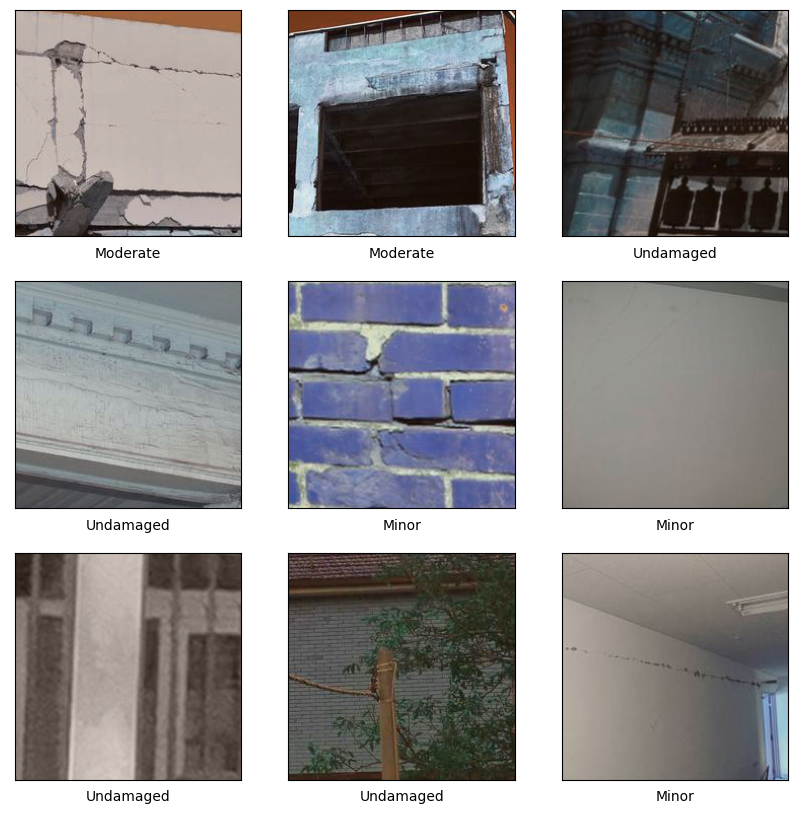

In [7]:
# Validate dataset
import random

label_names = ["Heavy", "Minor", "Moderate", "Undamaged"]
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    rand_int = random.randrange(len(train_images))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_int])
    # get label index to convert into label name
    label_index = 0
    for j in range(len(train_labels[rand_int])):
        if train_labels[rand_int][j] == 1:
            label_index = j
            break
    plt.xlabel(label_names[label_index])

plt.show()

In [66]:
# Setup model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 64)       

In [67]:
# Overfitted Run
epochs = 10

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

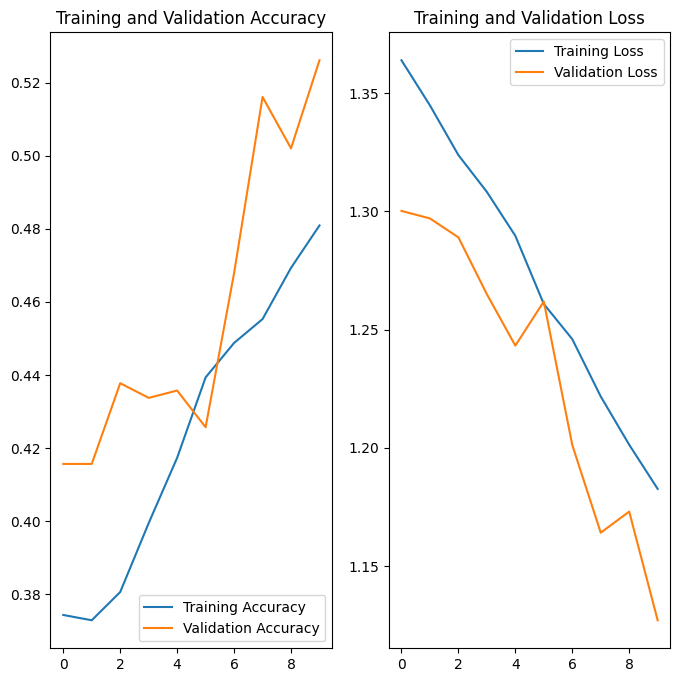

In [68]:
# Analyze Run
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0,epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
# Data Augmentation
aug = preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

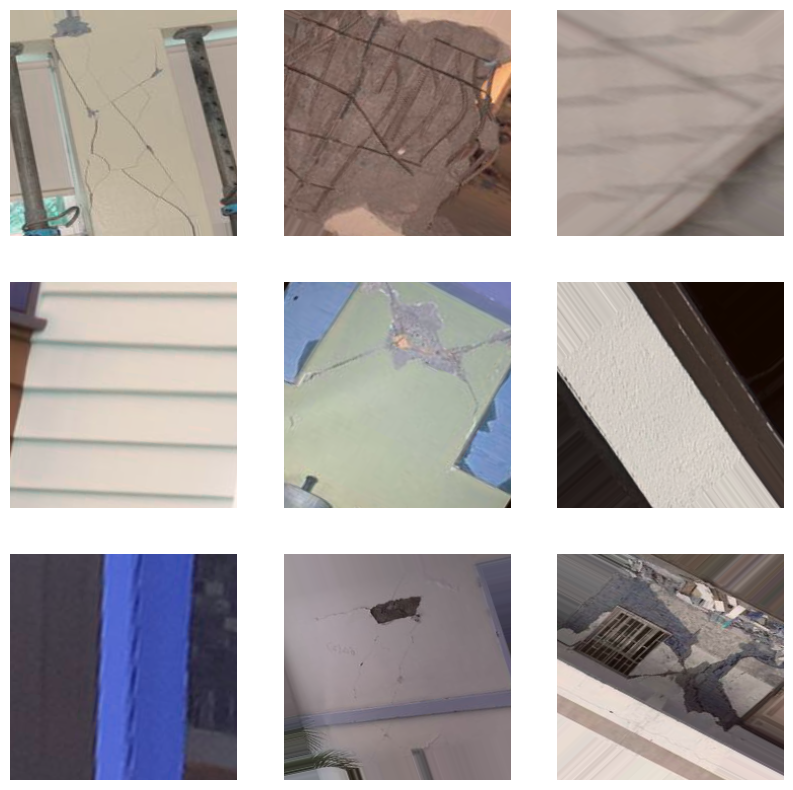

In [70]:

augmented_images = aug.flow(train_images)

# Plot Augmentation
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(next(augmented_images)[i])
    plt.axis("off")

In [72]:
# Improved Run
epochs = 2 # for testing final should probably be 15+

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(aug.flow(train_images, train_labels), epochs=epochs, 
                    validation_data=(test_images, test_labels))

130/130 [==============================] - 74s 562ms/step - loss: 1.2391 - accuracy: 0.4386 - val_loss: 1.2334 - val_accuracy: 0.4659


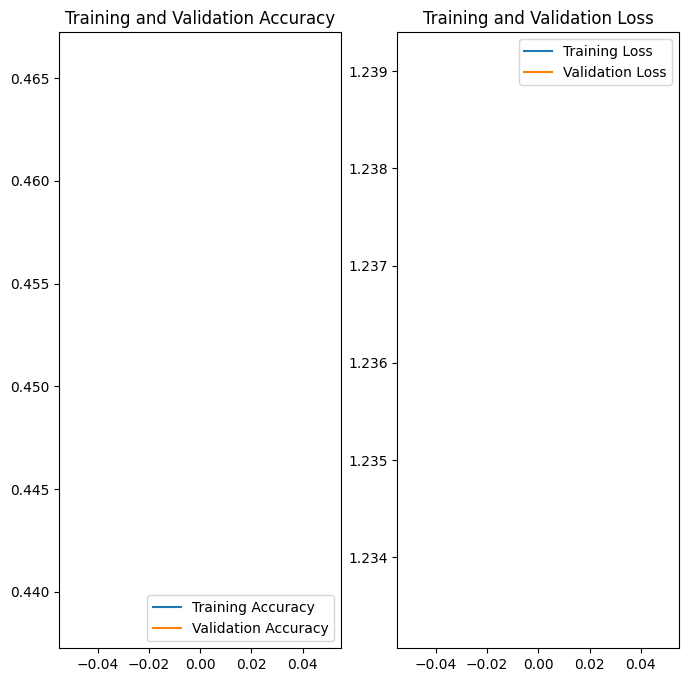

In [73]:
# Analyze Improved Run
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0,epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
# Predict on new images
rand_int = random.randrange(len(test_images))
predictions = model.predict(test_images[rand_int:rand_int+1])
score = tf.nn.softmax(predictions[0])

class_names = ["Heavy damage", "Minor damage", "Moderate damage", "Undamaged state"]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Plot Augmentation
plt.figure(figsize=(5, 5))
plt.imshow(test_images[0])
plt.axis("off")

NameError: name 'model' is not defined